# Goals

#### Predict Gender and age in given groups based on the datasets provided 
These datasets come in csv files connected by different identification keys. 

# Understand the data
This is crucial! There are basic explanations on the competitions [website](https://www.kaggle.com/c/talkingdata-mobile-user-demographics/data). Here is the data connection diagramm given:
![Data diagramm](data_tree.png)

We also already now that the company names are provided in chinese, which is not particularly helpful. Then, we see that the apps already are categorised, which is handy. However, doubt is present that the variable can be used out-of-the box.

In [14]:
# Set input dir
import sys
tmp = %pwd
files_dir = tmp + "/files" 

In [22]:
# We can have a look what's in the files directory
%ls files/

app_events.csv  gender_age_test.csv   phone_brand_device_model.csv
app_labels.csv  gender_age_train.csv  sample_submission.csv
events.csv      label_categories.csv


In [34]:
# Now import some data and look what we've got 
import pandas as pd
import IPython as ip

ga_test = pd.read_csv(files_dir+"/gender_age_test.csv")
ga_train = pd.read_csv(files_dir+"/gender_age_train.csv")

In [33]:
ip.display.display(ga_test.head(5),ga_test.describe())
# simple device ids. to predict gender and age, we need to combine the devide ids with our features finally used to predict the category

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


,device_id
count,1.120710e+05
mean,-2.367461e+16
std,5.331855e+18
min,-9.223322e+18
25%,-4.661036e+18
50%,-3.107321e+16
75%,4.581985e+18
max,9.223069e+18


#### In total we have 112,071 devices to predict

In [35]:
ip.display.display(ga_train.head(5), ga_train.describe())

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


,device_id,age
count,7.464500e+04,74645.000000
mean,-7.491354e+14,31.410342
std,5.327150e+18,9.868735
min,-9.223067e+18,1.000000
25%,-4.617367e+18,25.000000
50%,-1.841362e+16,29.000000
75%,4.636656e+18,36.000000
max,9.222849e+18,96.000000


#### Unfortunately we have less data to train on, 'only' 74,645 devices. 
We have a rich data structure to explore, I guess we'll end up with k-folding.

In [41]:
g = ga_train['gender']

In [60]:
%matplotlib inline

In [81]:
g.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

In [65]:
import matplotlib.pyplot as plt

(-1.0081850964587609, 1.0152298683632917, -1.0128984268823065, 1.0)

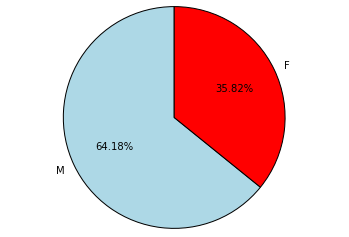

In [88]:
plt.pie(g.value_counts(),colors=['lightblue','red'],labels=g.value_counts().index, autopct='%2.2f%%', startangle=90)
plt.axis('equal')

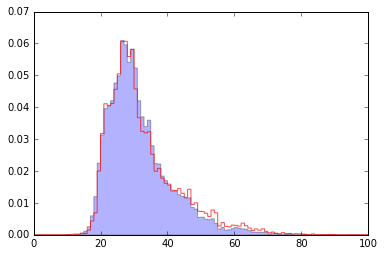

In [114]:
plt.hist(ga_train.age[ga_train.gender=='M'],100,normed=True,color='b',histtype='stepfilled', alpha=0.3, range=(0,100)); # colon to prevent numeric output prior to plot
plt.hist(ga_train.age[ga_train.gender=='F'],100,normed=True,color='r',histtype='step', alpha=0.7, range=(0,100));
